## Setup

In [1]:
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from utils import *
from q_learning import *
from deep_q_learning import *

In [2]:
# Configurations
save_stats = True
save_figs = True
train = True
load = not train

seed = 0

In [3]:
# Configuration paramaters for the whole setup
#seed = 0

env = TictactoeEnv()

gamma = 0.99
lr = 5e-4
epsilon_min = 0.1
epsilon_max = 0.8
num_episodes = 2000
test_freq = 250
num_avg = 1

## Learning from experts

### Question 11: Average reward and average loss during training

In [5]:
epsilon = 0.1
rewards_list = []
losses_list = []
for i in range(num_avg):
    model, stats = deep_q_learning(env, verbose=True, epsilon_exploration=epsilon,
                                   test_freq=250, num_episodes=num_episodes, against_opt=True)
    rewards_list.append(stats['rewards'])
    losses_list.append(stats['loss_train'])

Episode  0 :	M_opt =  -1.0 	M_rand =  -0.98
******* Updating target network *******
Episode  250 :	M_opt =  -1.0 	M_rand =  -0.28
Episode  500 :	M_opt =  -0.5 	M_rand =  -0.086
******* Updating target network *******
Episode  750 :	M_opt =  -0.382 	M_rand =  0.164
Episode  1000 :	M_opt =  -0.67 	M_rand =  0.446
******* Updating target network *******
Episode  1250 :	M_opt =  -0.406 	M_rand =  0.594
Episode  1500 :	M_opt =  -0.462 	M_rand =  0.562
******* Updating target network *******
Episode  1750 :	M_opt =  -0.202 	M_rand =  0.684
Episode  2000 :	M_opt =  -0.122 	M_rand =  0.786


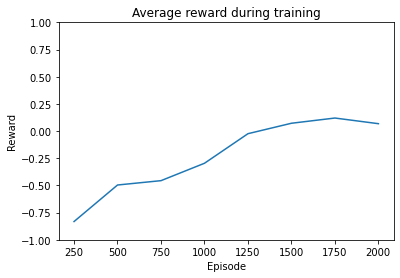

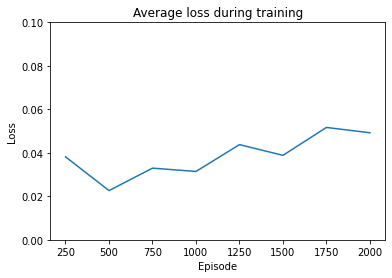


----- Trained  player-----
M_opt =  -0.086
M_rand =  0.758
M_teacher =  0.352

----- Optimal  player-----
M_opt =  0.0
M_rand =  0.92
M_teacher =  0.628

----- Random  player-----
M_opt =  -0.92
M_rand =  -0.024
M_teacher =  -0.516


In [8]:
# Plotting the average reward and average loss for every 250 games during training
running_rewards_list = []
for reward in rewards_list:
    running_average_rewards, x = running_average(reward)
    running_rewards_list.append(running_average_rewards)
    
running_losses_list = []
for loss in losses_list:
    running_average_losses, x = running_average(loss)
    running_losses_list.append(running_average_losses)

running_average_rewards = np.mean(running_rewards_list, axis=0)
stds = np.std(running_rewards_list, axis=0)
fig = plt.figure()
plt.plot(x, running_average_rewards)
plt.fill_between(x, running_average_rewards - stds, running_average_rewards + stds, alpha=0.2)
plt.ylim([-1,1])
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Average reward during training')
plt.show()
if save_figs:
        output_folder = os.path.join(os.getcwd(), 'figures')
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(output_folder + '/rewards_Q11_DEEP.png')
        fig.savefig(output_folder + '/rewards_Q11_DEEP.pdf', format = 'pdf')

running_average_losses = np.mean(running_losses_list, axis=0)
stds = np.std(running_rewards_list, axis=0)
fig = plt.figure()
plt.plot(x, running_average_losses)
plt.fill_between(x, running_average_losses - stds, running_average_losses + stds, alpha=0.2)
plt.ylim([0,0.1])
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.title('Average loss during training')
plt.show()
if save_figs:
        output_folder = os.path.join(os.getcwd(), 'figures')
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(output_folder + '/loss_Q11_DEEP.png')
        fig.savefig(output_folder + '/loss_Q11_DEEP.pdf', format = 'pdf')
        
    
# Comparing the performance with the optimal player and the random player
turns = np.array(['X','O'])
player_opt = OptimalPlayer(epsilon=0.)
player_rand = OptimalPlayer(epsilon=1.)
teacher = OptimalPlayer(epsilon=0.5)

names = ['Trained', 'Optimal', 'Random']
players = [DeepQPlayer(model=model), OptimalPlayer(epsilon=0.), OptimalPlayer(epsilon=1.)]

for (name, player) in zip(names, players):
    print("\n-----", name, " player-----")
    m_opt = measure_performance(player, player_opt)
    print("M_opt = ", m_opt)
    m_rand = measure_performance(player, player_rand)
    print("M_rand = ", m_rand)
    m_teacher = measure_performance(player, teacher)
    print("M_teacher = ", m_teacher)

### Question 12: no replay buffer and batch_size = 1

In [ ]:
epsilon = 0.1
rewards_list = []
losses_list = []
for i in range(num_avg):
    model, stats = deep_q_learning(env, verbose=True, epsilon_exploration=epsilon,
                                   test_freq=250, num_episodes=num_episodes, against_opt=True)
    rewards_list.append(stats['rewards'])
    losses_list.append(stats['loss_train'])

In [ ]:
# Plotting the average reward and average loss for every 250 games during training
running_rewards_list = []
for reward in rewards_list:
    running_average_rewards, x = running_average(reward)
    running_rewards_list.append(running_average_rewards)
    
running_losses_list = []
for loss in losses_list:
    running_average_losses, x = running_average(loss)
    running_losses_list,append(running_average_losses)

running_average_rewards = np.mean(running_rewards_list, axis=0)
stds = np.std(running_rewards_list, axis=0)
fig = plt.figure()
plt.plot(x, running_average_rewards)
plt.fill_between(x, running_average_rewards - stds, running_average_rewards + stds, alpha=0.2)
plt.ylim([-1,1])
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Average reward during training')
plt.show()
if save_figs:
        output_folder = os.path.join(os.getcwd(), 'figures')
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(output_folder + '/rewards_Q11_DEEP.png')
        fig.savefig(output_folder + '/rewards_Q11_DEEP.pdf', format = 'pdf')

running_average_losses = np.mean(running_losses_list, axis=0)
stds = np.std(running_rewards_list, axis=0)
fig = plt.figure()
plt.plot(x, running_average_losses)
plt.fill_between(x, running_average_losses - stds, running_average_losses + stds, alpha=0.2)
plt.ylim([-1,1])
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.title('Average loss during training')
plt.show()
if save_figs:
        output_folder = os.path.join(os.getcwd(), 'figures')
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(output_folder + '/loss_Q11_DEEP.png')
        fig.savefig(output_folder + '/loss_Q11_DEEP.pdf', format = 'pdf')
        
    
# Comparing the performance with the optimal player and the random player
turns = np.array(['X','O'])
player_opt = OptimalPlayer(epsilon=0.)
player_rand = OptimalPlayer(epsilon=1.)
teacher = OptimalPlayer(epsilon=0.5)

names = ['Trained', 'Optimal', 'Random']
players = [DeepQPlayer(model=model), OptimalPlayer(epsilon=0.), OptimalPlayer(epsilon=1.)]

for (name, player) in zip(names, players):
    print("\n-----", name, " player-----")
    m_opt = measure_performance(player, player_opt)
    print("M_opt = ", m_opt)
    m_rand = measure_performance(player, player_rand)
    print("M_rand = ", m_rand)
    m_teacher = measure_performance(player, teacher)
    print("M_teacher = ", m_teacher)

### Question 13: Decreasing exploration for different values of $n^{*}$

In [9]:
vec_n_star = np.hstack((np.array([1, 100, 500, 750]), np.round(np.logspace(3, np.log10(40000), 16))))

In [10]:
deep_q_learning_params_list = []
for n_star in vec_n_star:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'against_opt': True}
    deep_q_learning_params_list.append(params)